In [1]:
#Importing the library
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('D:/Users/Adib Razak/Desktop/Recycleable_Classification'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
import os

import numpy as np 
import pandas as pd 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
#Splitting the data into train and validate
IMAGE_SIZE = [224, 224]

train_path = "D:/Users/Adib Razak/Desktop/Recycleable_Classification/dataSplit4/train"
valid_path = "D:/Users/Adib Razak/Desktop/Recycleable_Classification/dataSplit4/val"

In [4]:
#ResNet50 Transfer Learning Model creation
# Import the Resnet50 architecture
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
#Finding the number of classes
folders = glob('D:/Users/Adib Razak/Desktop/Recycleable_Classification/dataSplit4/train/*')

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
model.compile(
  loss='categorical_crossentropy', 
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
#Data Augumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
#Creating training dataset
training_set = train_datagen.flow_from_directory('D:/Users/Adib Razak/Desktop/Recycleable_Classification/dataSplit4/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical') 

Found 4285 images belonging to 2 classes.


In [15]:
#Creating testing dataset
test_set = test_datagen.flow_from_directory('D:/Users/Adib Razak/Desktop/Recycleable_Classification/dataSplit4/val',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 1428 images belonging to 2 classes.


In [16]:
#Creating a model checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint
MODEL_DIR = "D:/Users/Adib Razak/Desktop/Recycleable_Classification/checkPoint"

if not os.path.exists(MODEL_DIR):  #If the directory does not exist, create it.
    os.makedirs(MODEL_DIR)
checkpoint = ModelCheckpoint(filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"), save_best_only=True) 

In [17]:
#do not run
#!pip install Pillow

In [18]:
#Fitting the model
#Training the model on 20 epochs
#fit the model
from PIL import Image

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
268/268 [==============================] - 189s 704ms/step - loss: 1.1764 - accuracy: 0.6712 - val_loss: 0.9462 - val_accuracy: 0.7031
Epoch 2/20
268/268 [==============================] - 182s 679ms/step - loss: 0.7086 - accuracy: 0.7433 - val_loss: 0.7043 - val_accuracy: 0.7612
Epoch 3/20
268/268 [==============================] - 178s 665ms/step - loss: 0.9614 - accuracy: 0.7207 - val_loss: 1.2301 - val_accuracy: 0.7178
Epoch 4/20
268/268 [==============================] - 179s 667ms/step - loss: 0.7279 - accuracy: 0.7657 - val_loss: 0.9456 - val_accuracy: 0.7465
Epoch 5/20
268/268 [==============================] - 179s 667ms/step - loss: 0.8399 - accuracy: 0.7491 - val_loss: 0.8147 - val_accuracy: 0.7801
Epoch 6/20
268/268 [==============================] - 179s 667ms/step - loss: 0.8165 - accuracy: 0.7676 - val_loss: 2.2093 - val_accuracy: 0.5784
Epoch 7/20
268/268 [============================

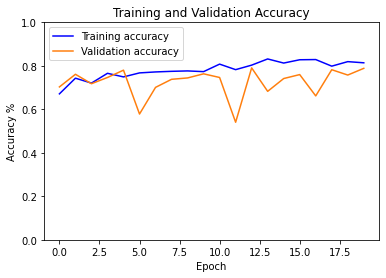

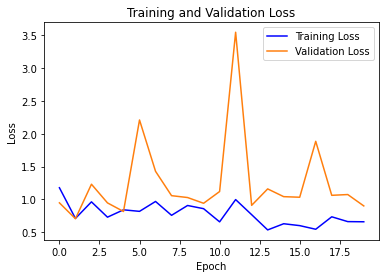

In [22]:
import matplotlib.pyplot as plt
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

epochs = range(len(acc))
#plt.show()
plt.ylim([0, 1])
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'tab:orange', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.legend()
plt.savefig('D:/Users/Adib Razak/Desktop/Recycleable_Classification/Results/Accuracy1.png')
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'tab:orange', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('D:/Users/Adib Razak/Desktop/Recycleable_Classification/Results/Loss1.png')

plt.show()

In [42]:
#Importing the library
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [43]:
#Saving the model
from tensorflow.keras.models import load_model

model.save('D:/Users/Adib Razak/Desktop/Recycleable_Classification/resnet.h5')

In [44]:
#Predicting the model

y_pred = model.predict(test_set)
y_pred

array([[1.3721714e-03, 9.9862790e-01],
       [9.9999034e-01, 9.6679714e-06],
       [9.9999905e-01, 9.3336718e-07],
       ...,
       [9.9987590e-01, 1.2407418e-04],
       [2.6691252e-05, 9.9997330e-01],
       [1.5936852e-02, 9.8406315e-01]], dtype=float32)

In [45]:
import numpy as np
y_pred = np.argmax(y_pred, axis=0) #axis=1

In [46]:
#Loading the model to do predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [47]:
model=load_model('D:/Users/Adib Razak/Desktop/Recycleable_Classification/resnet.h5')

In [48]:
training_set.class_indices

{'NonRecyclable': 0, 'Recyclable': 1}

In [52]:
#Checking the Predictions using validation dataset
# test data to check model and predict 
img = image.load_img('D:/Users/Adib Razak/Desktop/Recycleable_Classification/datasplit4/test/Recyclable/avgClhR1766.jpg', target_size = (224, 224))
showImg = img
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
result = model.predict(img)

if result[0][0] == 1:
    prediction = 'Recyclable'
else:
    prediction = 'Non-Recyclable'

prediction

'Recyclable'

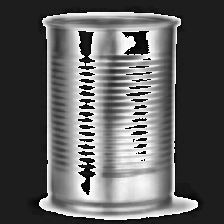

In [53]:
showImg

In [54]:
# test data to check model and predict 
img = image.load_img('D:/Users/Adib Razak/Desktop/Recycleable_Classification/datasplit4/test/NonRecyclable/avgClhN2394.jpg', target_size = (224, 224))
showImg = img
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
result = model.predict(img)

if result[0][0] == 1:
    prediction = 'Recyclable'
else:
    prediction = 'Non-Recyclable'

prediction

'Non-Recyclable'

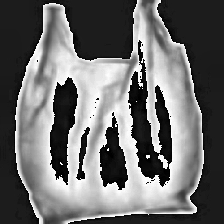

In [55]:
showImg

In [ ]:
#####################################################################

In [106]:
#Checking the Predictions using validation dataset
CATEGORIES = ["NonRecyclable", "Recyclable"]

img = image.load_img('D:/Users/Adib Razak/Desktop/Recycleable_Classification/datasplit4/test/Recyclable/avgClhR33.jpg', target_size = (224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
result = model.predict(img)

pred_name = CATEGORIES[np.argmax(result)]
pred_name

'Recyclable'

In [ ]:
#to plot confusion matrix
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)